In [1]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits import mplot3d
import seaborn as sns
%matplotlib inline

# Problem 1

In [3]:
# read data
df = pd.read_csv('Exp.txt', sep=',', names = ['x1','x2','x3','y'], header = None)
df.head()

,x1,x2,x3,y
0,0.57,-0.08,0.27,0
1,-0.60,-0.77,0.68,2
2,-0.57,0.94,0.67,1
3,0.92,-0.06,0.32,0
4,-0.14,-0.76,-0.11,2


2 useful angles


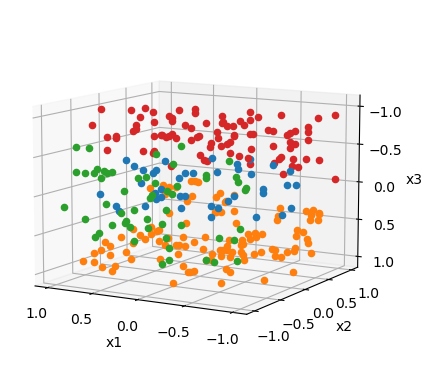

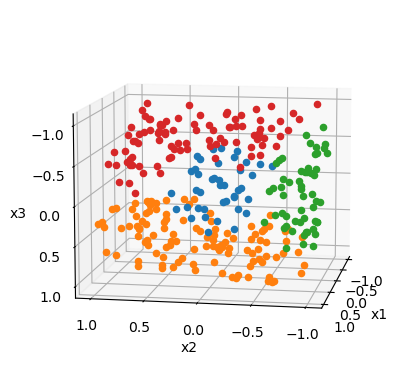

In [5]:
###### PART A #######
print('2 useful angles')
fig = plt.figure()
fig2 = plt.figure()
ax = fig.add_subplot(projection='3d')
ax2 = fig2.add_subplot(projection='3d')

# colors: blue -> y=0, orange -> y=1, green -> y=2, red -> y=3
for index,row in df.iterrows():
    if row['y'] == 0:
        cur_color = 'tab:blue'
    elif row['y'] == 1:
        cur_color = 'tab:orange'
    elif row['y'] == 2:
        cur_color = 'tab:green'
    else:
        cur_color = 'tab:red'
    ax.scatter(row['x1'], row['x2'], row['x3'], color=cur_color)
    ax2.scatter(row['x1'], row['x2'], row['x3'], color=cur_color)
    
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.view_init(-170, 60)

ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('x3')
ax2.view_init(-170, 170)


x2 vs. x3 is by far the most useful comparison to make when labelling these data


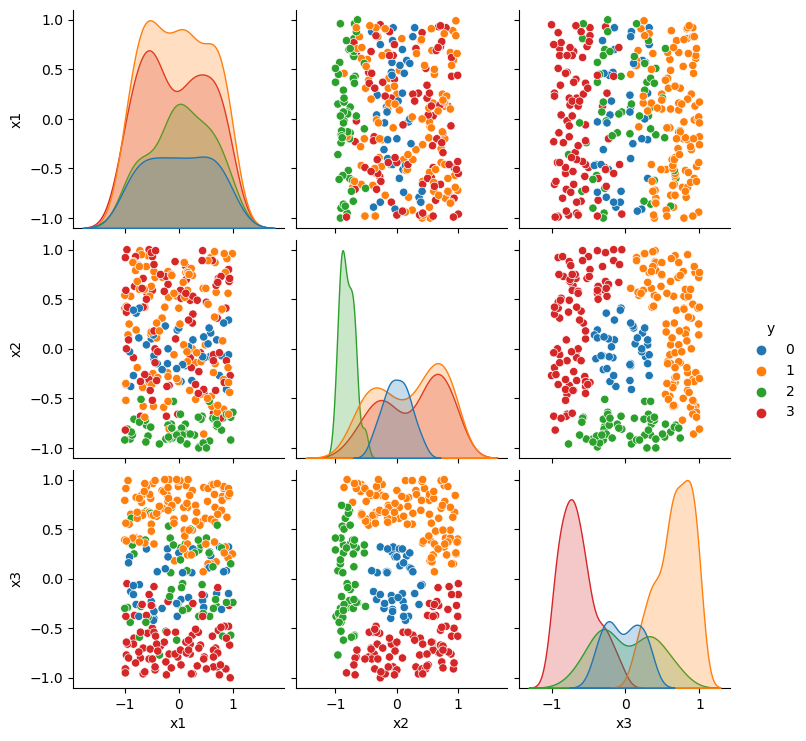

In [7]:
###### PART B #######
sns.pairplot(df, hue = 'y', palette = "tab10")
print("x2 vs. x3 is by far the most useful comparison to make when labelling these data")

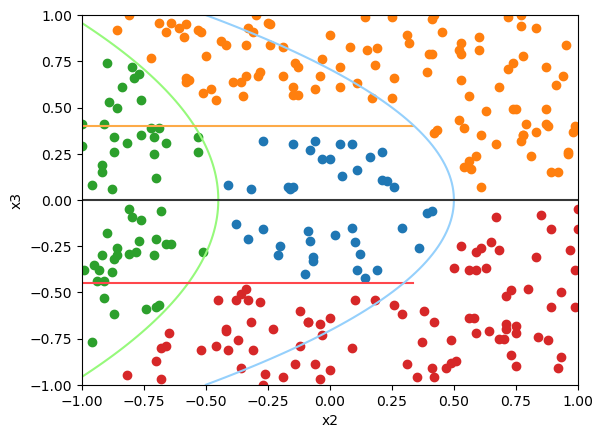

In [24]:
###### PART C #######
fig = plt.figure()
# colors: blue -> y=0, orange -> y=1, green -> y=2, red -> y=3
for index,row in df.iterrows():
    if row['y'] == 0:
        cur_color = 'tab:blue'
    elif row['y'] == 1:
        cur_color = 'tab:orange'
    elif row['y'] == 2:
        cur_color = 'tab:green'
    else:
        cur_color = 'tab:red'
    plt.scatter(row['x2'], row['x3'], color=cur_color)
    
plt.xlabel('x2')
plt.ylabel('x3')
plt.xlim([-1, 1])
plt.ylim([-1, 1])

###### create rules
# rule 1
z = np.linspace(-1,1,100)
a1 = -0.6*z*z - 0.45
plt.plot(a1,z,color = 'xkcd:light green')

# rule 2
a2 = np.full((100,1),0.4)
plt.plot(z[0:67],a2[0:67],color = 'xkcd:light orange')

# rule 3
a3 = np.full((100,1),-0.45)
plt.plot(z[0:67],a3[0:67],color = 'xkcd:light red')

# rule 4
a4 = -z*z + 0.5
plt.plot(a4,z,color = 'xkcd:light blue')

# rule 5
a5 = np.full((100,1),0)
plt.plot(z,a5,color = 'xkcd:dark gray')


In [23]:
###### PART D #######
# pseudocode for using the mathematical classification rule from part c
# 1. if a point is to the left of the green line, y = 2
# 2. elif a point is to the left of the blue line, below the orange line, and above the red line, y = 0
# 3. elif a point is above the dark gray line, y = 1
# 4. else, y = 3
# implementation and testing of code below:

# label array
yhat = np.empty(df.shape[0], dtype=int)

# label all the points
for index,row in df.iterrows():
    x2 = row['x2']
    x3 = row['x3']
    if x2 < -0.6*x3*x3 - 0.45:
        yhat[index] = 2
    elif (x2 < -x3*x3 + 0.5) and (x3 < 0.4) and (x3 > -0.45):
        yhat[index] = 0
    elif x3 > 0:
        yhat[index] = 1
    else:
        yhat[index] = 3

# add the yhat vector to the dataframe        
df['yhat'] = yhat

# compare yhat with y
wrong = 0
correct = 0
for index,row in df.iterrows():
    if row['y'] == row['yhat']:
        correct += 1
    else:
        wrong += 1
        
# print empirical risk (wrong/total number of points)
print(f'Empirical Risk: {wrong/(wrong + correct)}')
print('Therefore, the minimum empirical risk (ERM) is 0')

Empirical Risk: 0.0
Therefore, the minimum empirical risk (ERM) is 0


# Problem 2

In [2]:
# read data
d21 = pd.read_csv('Classify-2DwLabels-1.txt', sep=',', names = ['x1','x2','y'], header = None) # 2D, set 1
d22 = pd.read_csv('Classify-2DwLabels-2.txt', sep=',', names = ['x1','x2','y'], header = None) # 2D, set 2

Both datasets are linearly separable


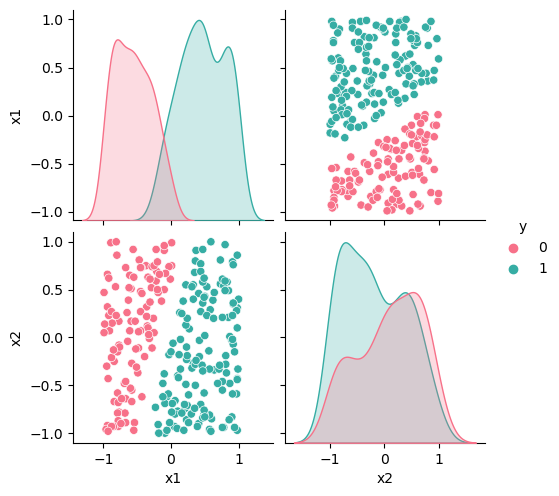

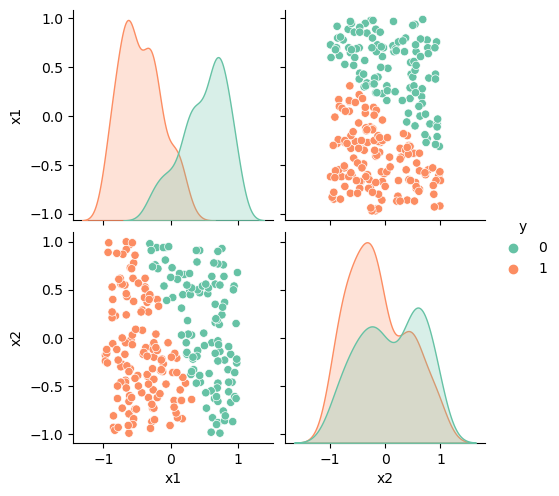

In [3]:
###### PART A #######
# set 1
sns.pairplot(d21, hue = 'y', palette = "husl")

# set 2
sns.pairplot(d22, hue = 'y', palette = "Set2")

print('Both datasets are linearly separable')

In [4]:
###### PART B #######

# perceptron algorithm, keeping track of iterations
def perceptron (x,y,w):
    # x = data (n-dimensional), DataFrame
    # y = binary classification of data, DataFrame
    # w = weights (n+1-dimensional), 
    
    t = 1 # number of iterations
    done = False # determines if algorithm is done
    y = y.replace(0,-1) # replace 0 labels with -1
    wall = np.zeros([1,w.size])
    
    while (not done):
        # iterate through each row in x
        for index,row in x.iterrows():
            # determines if there is a misclassification
            if (np.inner(w,y[index]*np.insert(row.to_numpy(),0,1))) <= 0:
                # update w
                error = np.insert(row.to_numpy(),0,1)
                if y[index] < 0:
                    wall = np.vstack((wall,w-error))
                    w = w - error
                else:
                    wall = np.vstack((wall,w+error))
                    w = w + error
                # add 1 to iteration count
                t += 1
                break
            if (index + 1 == (d21.shape[0] - 1)):
                done = True  
        # end algorithm if done    
        if done:
            return w, wall, t

C:\Users\alexh\AppData\Local\Temp\ipykernel_18392\4219071028.py:12: RuntimeWarning: invalid value encountered in true_divide
  sns.lineplot(x = a,y = (-wall[row,0]-wall[row,1]*a)/wall[row,2],alpha = 0.3)


DATASET 1
faint lines are incorrect classifiers
number of iterations = 21
[ 0.    4.16 -1.54]


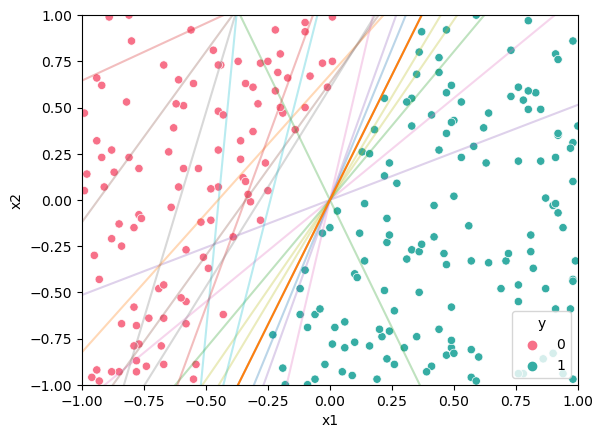

In [5]:
###### PART C #######
# initialize w
w = np.zeros(d21.shape[1])

# run perceptron algorithm on first dataset
w, wall, t = perceptron(d21[['x1','x2']],d21['y'],w)

# plot result
a = np.linspace(-1,1,100)

for row in range(wall.shape[0]):
    sns.lineplot(x = a,y = (-wall[row,0]-wall[row,1]*a)/wall[row,2],alpha = 0.3)
sns.lineplot(x = a,y = (-w[0]-w[1]*a)/w[2])    
sns.scatterplot(data = d21, x="x1", y="x2", hue="y", palette = "husl")
plt.xlim([-1,1])
plt.ylim([-1,1])

print("DATASET 1")
print("faint lines are incorrect classifiers")
print(f"number of iterations = {t}")
print(w)

C:\Users\alexh\AppData\Local\Temp\ipykernel_6696\3102734685.py:11: RuntimeWarning: invalid value encountered in true_divide
  sns.lineplot(x = a,y = (-wall[row,0]-wall[row,1]*a)/wall[row,2],alpha = 0.3)


SECOND DATA SET
faint lines are incorrect classifiers
number of iterations = 93


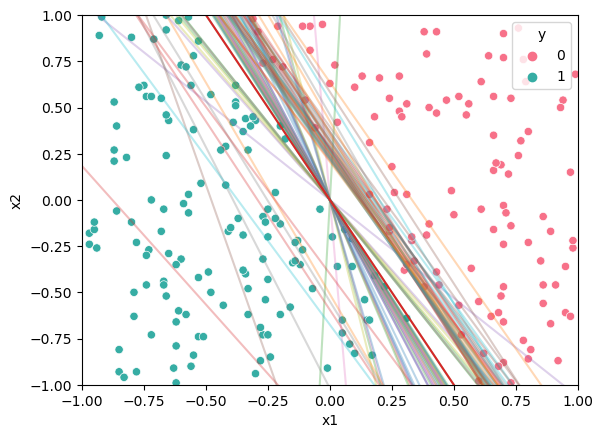

In [259]:
# initialize w
w = np.zeros(d22.shape[1])

# run perceptron algorithm on first dataset
w, wall, t = perceptron(d22[['x1','x2']],d22['y'],w)

# plot result
a = np.linspace(-1,1,100)

for row in range(wall.shape[0]):
    sns.lineplot(x = a,y = (-wall[row,0]-wall[row,1]*a)/wall[row,2],alpha = 0.3)
sns.lineplot(x = a,y = (-w[0]-w[1]*a)/w[2])    
sns.scatterplot(data = d22, x="x1", y="x2", hue="y", palette = "husl")
plt.xlim([-1,1])
plt.ylim([-1,1])

print("DATASET 2")
print("faint lines are incorrect classifiers")
print(f"number of iterations = {t}")


In [263]:
# comparing initializations of w
# dataset 1
print("DATASET 1")
w1 = np.zeros(d21.shape[1])
w1, wall, t = perceptron(d21[['x1','x2']],d21['y'],w1)
print(f"final weights when initialized with zeros: {w1}")
w2 = np.ones(d21.shape[1])
w2, wall, t = perceptron(d21[['x1','x2']],d21['y'],w2)
print(f"final weights when initialized with ones: {w2}")

# dataset 2
print("DATASET 2")
w3 = np.zeros(d22.shape[1])
w3, wall, t = perceptron(d22[['x1','x2']],d22['y'],w3)
print(f"final weights when initialized with zeros: {w3}")
w4 = np.ones(d22.shape[1])
w4, wall, t = perceptron(d22[['x1','x2']],d22['y'],w4)
print(f"final weights when initialized with ones: {w4}")

print("note that the weight vectors are slightly different with different initializations")

DATASET 1
final weights when initialized with zeros: [ 0.    4.16 -1.54]
final weights when initialized with ones: [ 0.    4.22 -1.55]
DATASET 2
final weights when initialized with zeros: [ 0.   -8.97 -4.48]
final weights when initialized with ones: [ 0.   -9.82 -4.9 ]
note that the weight vectors are slightly different with different initializations


# Problem 3

DATASET 1
number of iterations = 47
initialization = [0 0 0 0]
classifier = [ 0.   -5.77  4.31 -1.64]


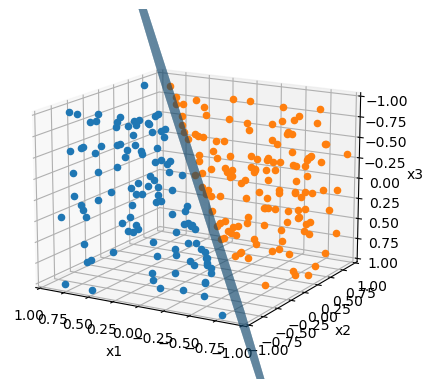

In [280]:
###### PART A #######
# read data
d31 = pd.read_csv('Classify-3DwLabels-1.txt', sep=',', names = ['x1','x2','x3','y'], header = None) # 3D, set 1
d32 = pd.read_csv('Classify-3DwLabels-2.txt', sep=',', names = ['x1','x2','x3','y'], header = None) # 3D, set 2

# initialize w
w = np.zeros(d31.shape[1])

# run perceptron algorithm on first dataset
w, wall, t = perceptron(d31[['x1','x2','x3']],d31['y'],w)

# plot result
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

a = np.linspace(-1,1,100)
b = np.linspace(-1,1,100)
a,b = np.meshgrid(a,b)
z = (-w[0]-w[1]*a-w[2]*b)/w[3]

ax.plot_surface(a, b, z)

for index,row in d31.iterrows():
    if row['y'] == 0:
        cur_color = 'tab:blue'
    elif row['y'] == 1:
        cur_color = 'tab:orange'
    ax.scatter(row['x1'], row['x2'], row['x3'], color=cur_color)

ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.view_init(-165, 60)

print("DATASET 1")
print(f"number of iterations = {t}")
print(f"initialization = [0 0 0 0]")
print(f"classifier = {w}")      


pair plot does not show an obvious split between the data


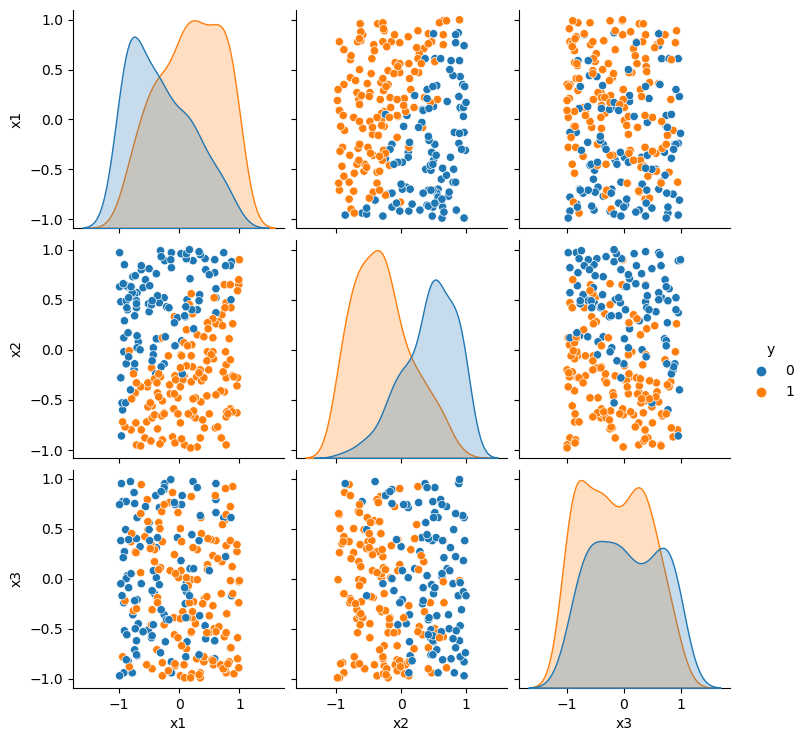

In [294]:
###### PART B #######
print('pair plot does not show an obvious split between the data')
sns.pairplot(d32, hue = 'y', palette = "tab10")

In [295]:
# # initialize w
w = np.zeros(d32.shape[1])

# # run perceptron algorithm on first dataset
w, wall, t = perceptron(d32[['x1','x2','x3']],d32['y'],w)

# # plot result
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

a = np.linspace(-1,1,100)
b = np.linspace(-1,1,100)
a,b = np.meshgrid(a,b)
z = (-w[0]-w[1]*a-w[2]*b)/w[3]

ax.plot_surface(a, b, z)

for index,row in d32.iterrows():
    if row['y'] == 0:
        cur_color = 'tab:blue'
    elif row['y'] == 1:
        cur_color = 'tab:orange'
    ax.scatter(row['x1'], row['x2'], row['x3'], color=cur_color)

ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.view_init(120, 30)

print("DATASET 2")
print(f"number of iterations = {t}")
print(f"initialization = [0 0 0 0]")
print(f"classifier = {w}")      


KeyboardInterrupt: 

See above cell error: perceptron algorithm never finishes because the data is not separable. I determined the data was not separable by looking at the pair plots and different 3d plot angles

# end homework